In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("pima_indians_diabetes_with_header.csv")

In [63]:
# Simpan label asli untuk perbandingan nanti
true_labels = df['Outcome']

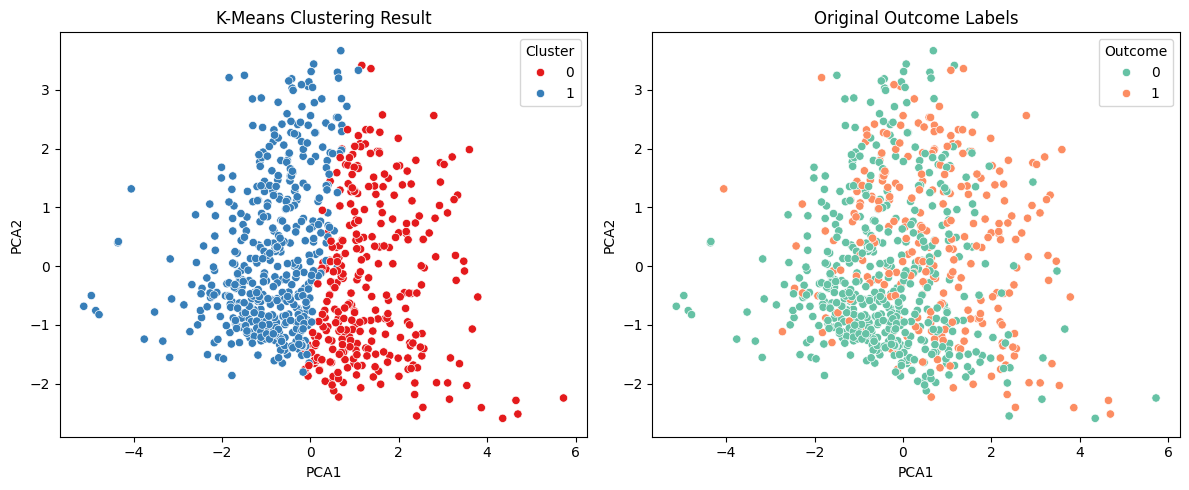

In [64]:
# Drop kolom Outcome
X = df.drop(columns=['Outcome'])

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Jalankan K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['Outcome'] = true_labels  # Tambahkan kembali Outcome untuk visualisasi

# Visualisasi hasil K-Means
plt.figure(figsize=(12, 5))

# Plot K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Plot berdasarkan label asli
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Outcome', palette='Set2')
plt.title('Original Outcome Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

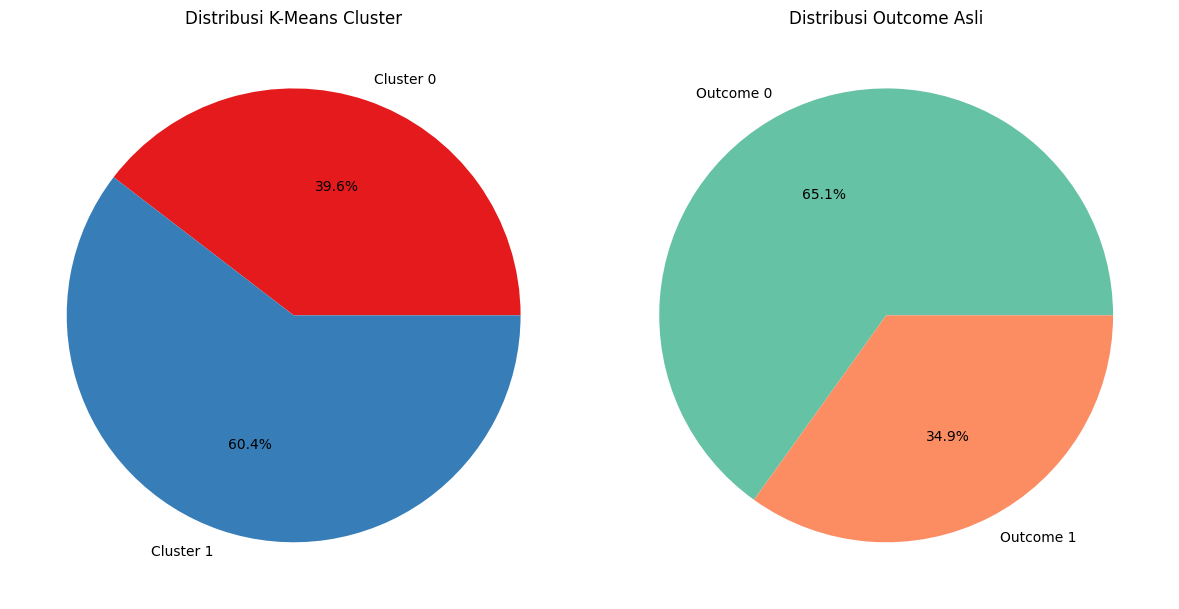

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah anggota tiap cluster (hasil K-Means) dan tiap label (Outcome asli)
cluster_counts = df['Cluster'].value_counts().sort_index()
outcome_counts = df['Outcome'].value_counts().sort_index()

# Side-by-side pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart K-Means cluster
axes[0].pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set1", n_colors=len(cluster_counts)))
axes[0].set_title("Distribusi K-Means Cluster")

# Pie chart Outcome asli
axes[1].pie(outcome_counts, labels=[f"Outcome {i}" for i in outcome_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(outcome_counts)))
axes[1].set_title("Distribusi Outcome Asli")

plt.tight_layout()
plt.show()

K-means cluster 1,2 = 0 = tidak diabetes, cluster 0 = 1 = diabetes

Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.76      0.70      0.73       500
      Diabetes       0.51      0.58      0.55       268

      accuracy                           0.66       768
     macro avg       0.64      0.64      0.64       768
  weighted avg       0.67      0.66      0.67       768



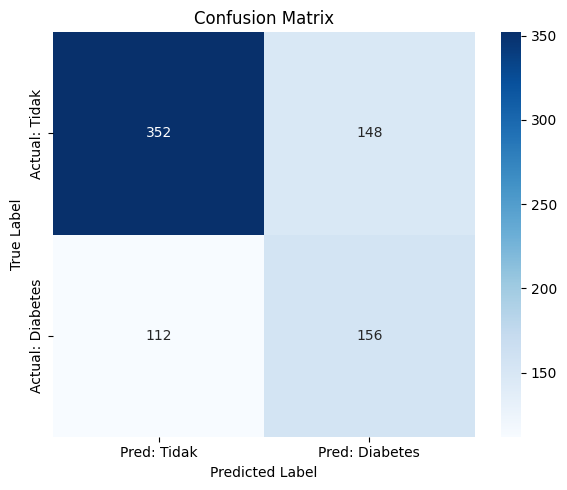

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping cluster ke label: Cluster 0 → 1 (diabetes), Cluster 1/2 → 0 (tidak diabetes)
mapped_pred = df['Cluster'].apply(lambda x: 1 if x == 0 else 0)
y_true = df['Outcome']

# 1. Classification Report (precision, recall, f1-score)
report = classification_report(y_true, mapped_pred, target_names=["Tidak Diabetes", "Diabetes"])
print("Classification Report:\n")
print(report)

# 2. Confusion Matrix
cm = confusion_matrix(y_true, mapped_pred)

# 3. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred: Tidak", "Pred: Diabetes"], yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

KNN Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.68      0.95      0.79       500
      Diabetes       0.62      0.15      0.24       268

      accuracy                           0.67       768
     macro avg       0.65      0.55      0.51       768
  weighted avg       0.65      0.67      0.60       768



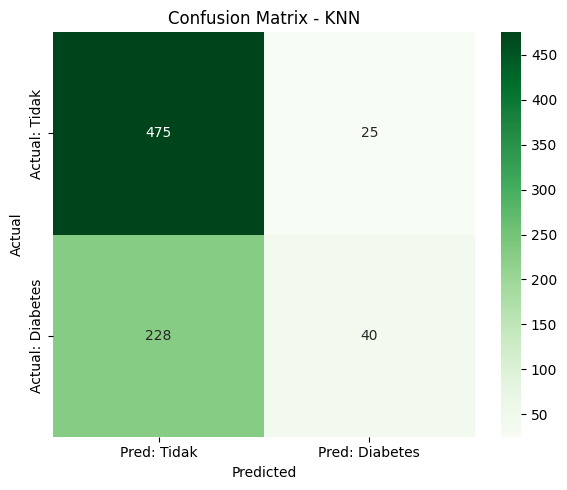

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Step 1: Split data ke train-test (karena KNN supervised)
X = df.drop(columns=['Outcome', 'Cluster', 'PCA1', 'PCA2'])  # hilangkan hasil KMeans & PCA
y = df['Cluster'].apply(lambda x: 1 if x == 0 else 0)  # label asli

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # bisa kamu ubah k-nya
knn.fit(X_train, y_train)

# Step 3: Prediksi semua data untuk ditaruh ke df
knn_predictions = knn.predict(X_scaled)
df['KNN_Pred'] = knn_predictions  # tambahkan hasil KNN ke dataframe

# Step 4: Evaluasi hasil KNN
print("KNN Classification Report:\n")
print(classification_report(y_true, knn_predictions, target_names=["Tidak Diabetes", "Diabetes"]))

# Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_true, knn_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Pred: Tidak", "Pred: Diabetes"],
            yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# 3 Cluster

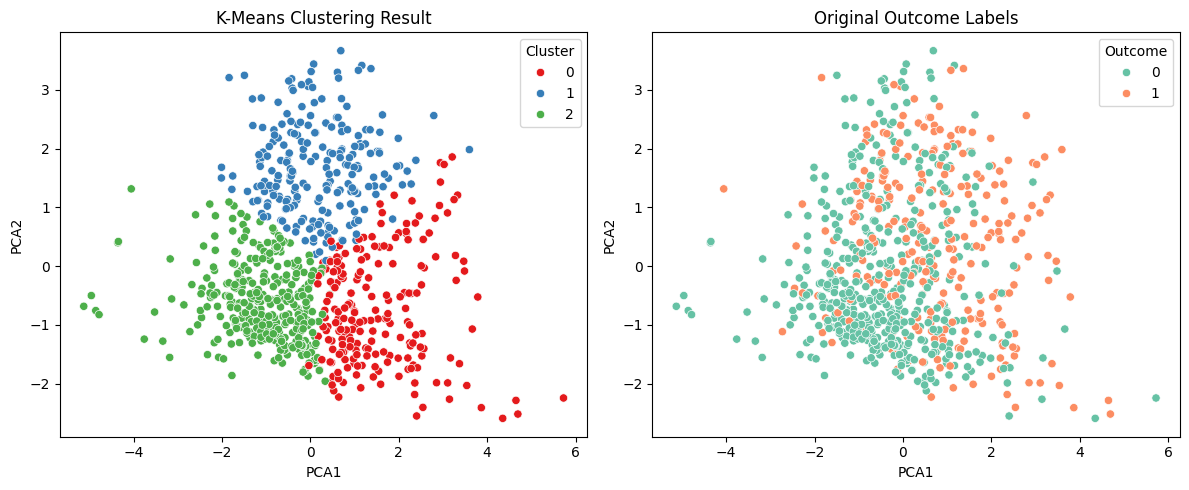

In [42]:
# Load dataset
df = pd.read_csv("pima_indians_diabetes_with_header.csv")

# Simpan label asli untuk perbandingan nanti
true_labels = df['Outcome']

# Drop kolom Outcome
X = df.drop(columns=['Outcome'])

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Jalankan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['Outcome'] = true_labels  # Tambahkan kembali Outcome untuk visualisasi

# Visualisasi hasil K-Means
plt.figure(figsize=(12, 5))

# Plot K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Plot berdasarkan label asli
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Outcome', palette='Set2')
plt.title('Original Outcome Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

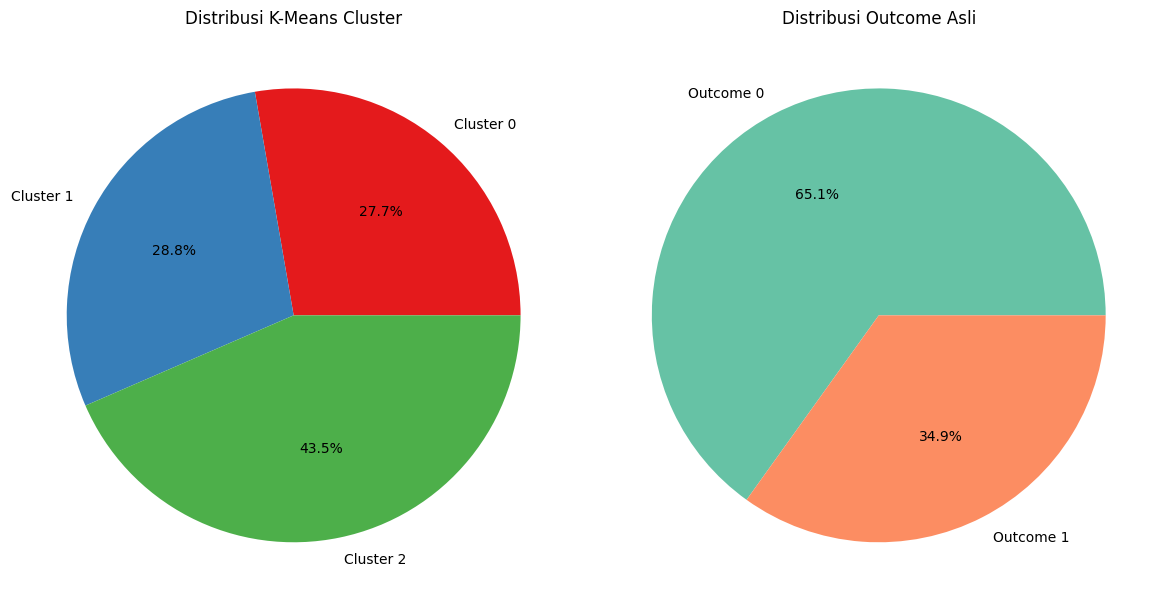

Akurasi Clustering (setelah mapping 3 cluster): 0.6706
Error Rate: 0.3294


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah anggota tiap cluster (hasil K-Means) dan tiap label (Outcome asli)
cluster_counts = df['Cluster'].value_counts().sort_index()
outcome_counts = df['Outcome'].value_counts().sort_index()

# Side-by-side pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart K-Means cluster
axes[0].pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set1", n_colors=len(cluster_counts)))
axes[0].set_title("Distribusi K-Means Cluster")

# Pie chart Outcome asli
axes[1].pie(outcome_counts, labels=[f"Outcome {i}" for i in outcome_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(outcome_counts)))
axes[1].set_title("Distribusi Outcome Asli")

plt.tight_layout()
plt.show()

import numpy as np

# Ambil hasil cluster dan label asli
y_pred = df['Cluster']
y_true = df['Outcome']

# Terapkan mapping:
# Cluster 0 → Outcome 1 (diabetes)
# Cluster 1 & 2 → Outcome 0 (tidak diabetes)
mapped_pred = y_pred.apply(lambda x: 1 if x == 0 else 0)

# Hitung akurasi dan error
accuracy = np.mean(mapped_pred == y_true)
error_rate = 1 - accuracy

print(f"Akurasi Clustering (setelah mapping 3 cluster): {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")

Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.72      0.80      0.76       500
      Diabetes       0.54      0.43      0.47       268

      accuracy                           0.67       768
     macro avg       0.63      0.61      0.62       768
  weighted avg       0.66      0.67      0.66       768



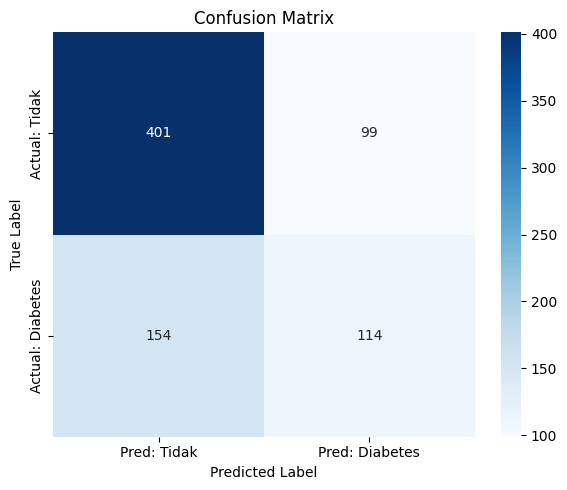

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping cluster ke label: Cluster 0 → 1 (diabetes), Cluster 1/2 → 0 (tidak diabetes)
mapped_pred = df['Cluster'].apply(lambda x: 1 if x == 0 else 0)
y_true = df['Outcome']

# 1. Classification Report (precision, recall, f1-score)
report = classification_report(y_true, mapped_pred, target_names=["Tidak Diabetes", "Diabetes"])
print("Classification Report:\n")
print(report)

# 2. Confusion Matrix
cm = confusion_matrix(y_true, mapped_pred)

# 3. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred: Tidak", "Pred: Diabetes"], yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 4 Cluster

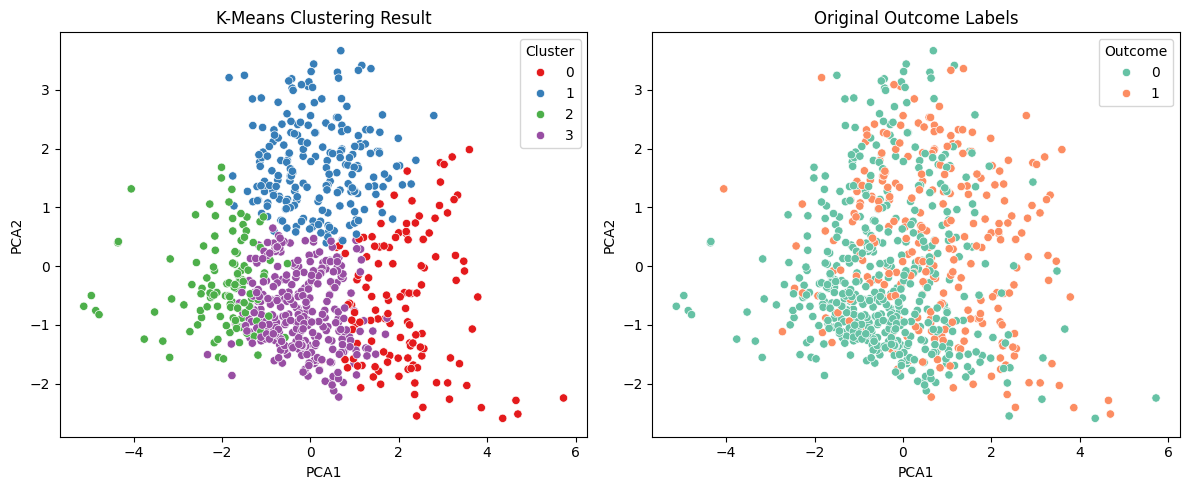

In [125]:
# Load dataset
df = pd.read_csv("pima_indians_diabetes_with_header.csv")

# Simpan label asli untuk perbandingan nanti
true_labels = df['Outcome']

# Drop kolom Outcome
X = df.drop(columns=['Outcome'])

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Jalankan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['Outcome'] = true_labels  # Tambahkan kembali Outcome untuk visualisasi

# Visualisasi hasil K-Means
plt.figure(figsize=(12, 5))

# Plot K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Plot berdasarkan label asli
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Outcome', palette='Set2')
plt.title('Original Outcome Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

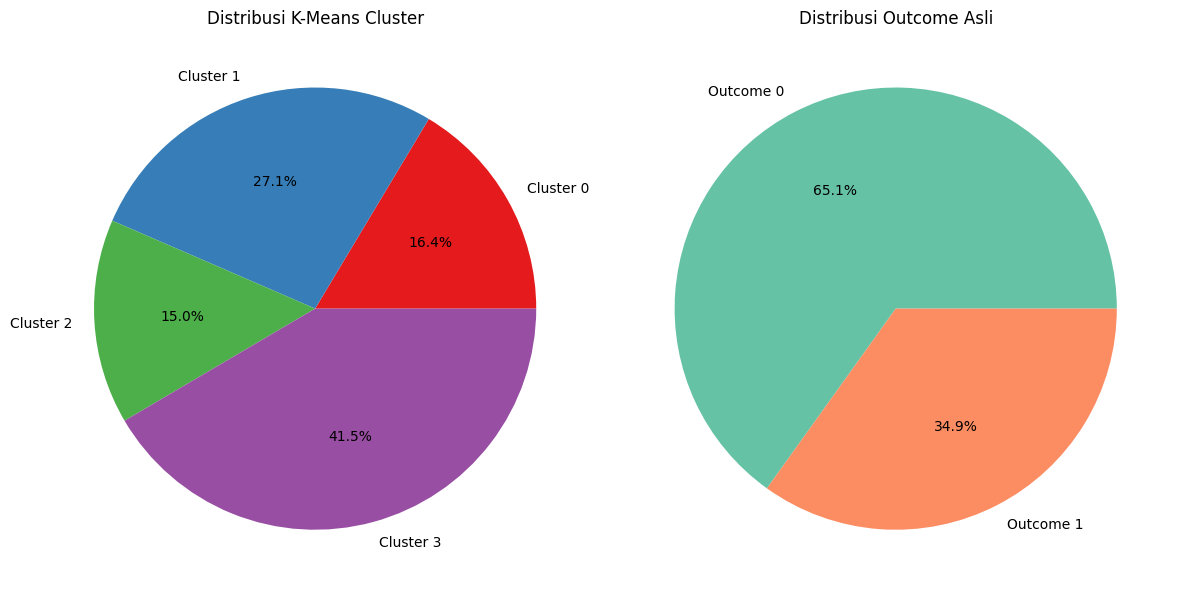

Akurasi Clustering (setelah mapping 4 cluster): 0.7031
Error Rate: 0.2969


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah anggota tiap cluster (hasil K-Means) dan tiap label (Outcome asli)
cluster_counts = df['Cluster'].value_counts().sort_index()
outcome_counts = df['Outcome'].value_counts().sort_index()

# Side-by-side pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart K-Means cluster
axes[0].pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set1", n_colors=len(cluster_counts)))
axes[0].set_title("Distribusi K-Means Cluster")

# Pie chart Outcome asli
axes[1].pie(outcome_counts, labels=[f"Outcome {i}" for i in outcome_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(outcome_counts)))
axes[1].set_title("Distribusi Outcome Asli")

plt.tight_layout()
plt.show()

import numpy as np

# Ambil hasil cluster dan label asli
y_pred = df['Cluster']
y_true = df['Outcome']

# Terapkan mapping:
# Cluster 0 → Outcome 1 (diabetes)
# Cluster 1 & 2 → Outcome 0 (tidak diabetes)
mapped_pred = y_pred.apply(lambda x: 1 if x == 0 else 0)

# Hitung akurasi dan error
accuracy = np.mean(mapped_pred == y_true)
error_rate = 1 - accuracy

print(f"Akurasi Clustering (setelah mapping 4 cluster): {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")

Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.71      0.91      0.80       500
      Diabetes       0.66      0.31      0.42       268

      accuracy                           0.70       768
     macro avg       0.69      0.61      0.61       768
  weighted avg       0.69      0.70      0.67       768



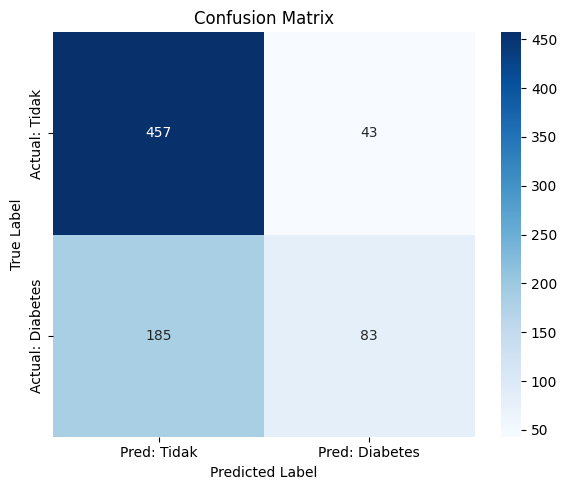

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping cluster ke label: Cluster 0 → 1 (diabetes), Cluster 1/2 → 0 (tidak diabetes)
mapped_pred = df['Cluster'].apply(lambda x: 1 if  x == 0 else 0)
y_true = df['Outcome']

# 1. Classification Report (precision, recall, f1-score)
report = classification_report(y_true, mapped_pred, target_names=["Tidak Diabetes", "Diabetes"])
print("Classification Report:\n")
print(report)

# 2. Confusion Matrix
cm = confusion_matrix(y_true, mapped_pred)

# 3. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred: Tidak", "Pred: Diabetes"], yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

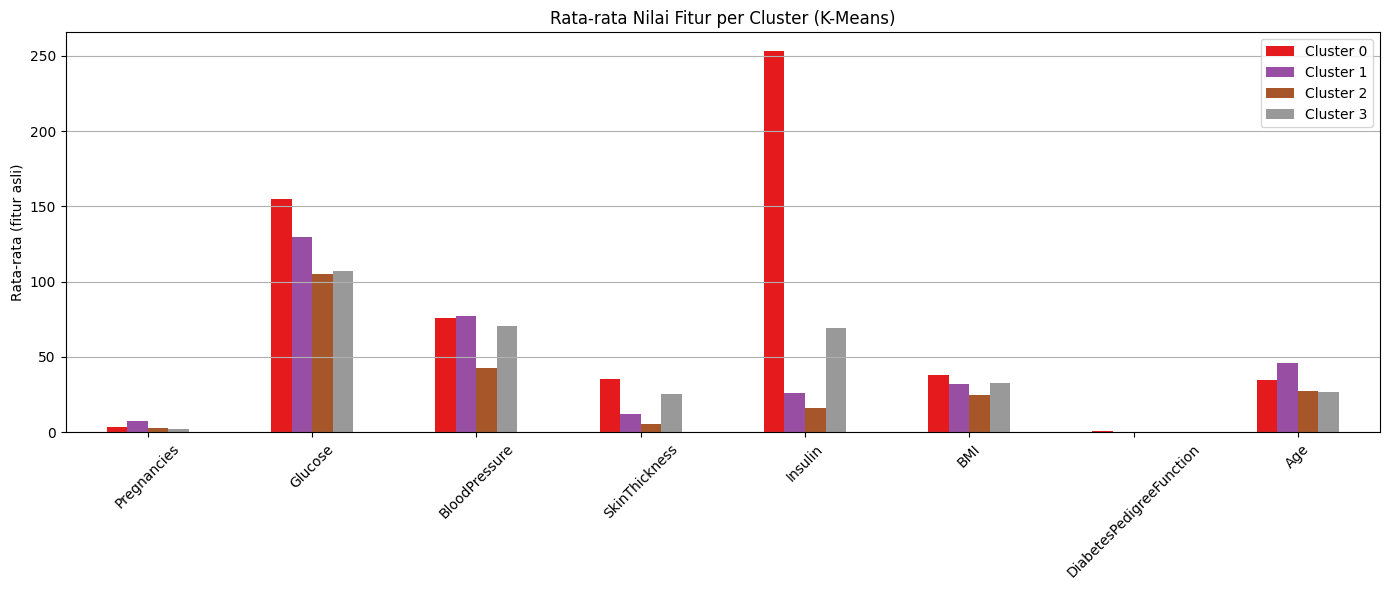

In [103]:
import matplotlib.pyplot as plt

# Ambil fitur asli (tanpa kolom hasil clustering dan PCA)
feature_columns = [col for col in df.columns if col not in ['Cluster', 'PCA1', 'PCA2', 'Outcome']]

# Hitung rata-rata tiap fitur per cluster
cluster_summary = df.groupby('Cluster')[feature_columns].mean().T

# Ganti nama kolom berdasarkan urutan Cluster (Cluster 0, 1, dst)
cluster_summary.columns = [f"Cluster {i}" for i in cluster_summary.columns]

# Plot
plt.figure(figsize=(12, 6))
cluster_summary.plot(kind='bar', figsize=(14, 6), colormap='Set1')
plt.title('Rata-rata Nilai Fitur per Cluster (K-Means)')
plt.ylabel('Rata-rata (fitur asli)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


KNN Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.71      0.94      0.81       500
      Diabetes       0.70      0.28      0.40       268

      accuracy                           0.71       768
     macro avg       0.71      0.61      0.61       768
  weighted avg       0.71      0.71      0.67       768



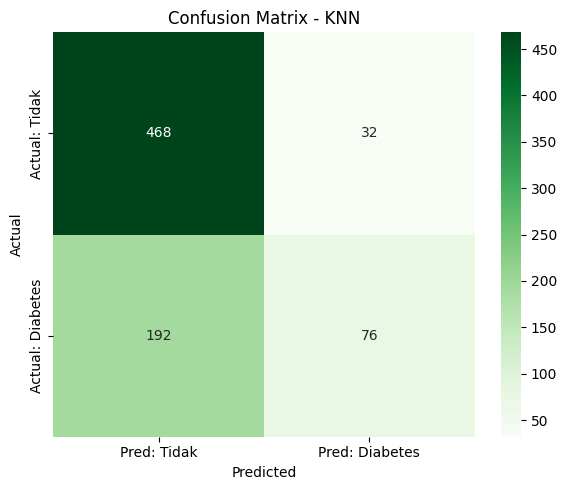

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Step 1: Split data ke train-test (karena KNN supervised)
X = df.drop(columns=['Outcome', 'Cluster', 'PCA1', 'PCA2'])  # hilangkan hasil KMeans & PCA
y = df['Cluster'].apply(lambda x: 1 if x == 0 else 0)
# y = df['Cluster']  # label asli

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # bisa kamu ubah k-nya
knn.fit(X_train, y_train)

# Step 3: Prediksi semua data untuk ditaruh ke df
knn_predictions = knn.predict(X_scaled)
df['KNN_Pred'] = knn_predictions  # tambahkan hasil KNN ke dataframe

# Step 4: Evaluasi hasil KNN
print("KNN Classification Report:\n")
print(classification_report(y_true, knn_predictions, target_names=["Tidak Diabetes", "Diabetes"]))

# Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_true, knn_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Pred: Tidak", "Pred: Diabetes"],
            yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Precision Tinggi (0.66) untuk "Diabetes" → Artinya:
Saat K-Means bilang seseorang "diabetes", 66% benar-benar diabetes → cukup bagus.

Tapi Recall Rendah (0.31) → Artinya:
Dari semua pasien yang benar-benar diabetes, hanya 31% yang berhasil ditemukan oleh K-Means.

Artinya: banyak pasien diabetes tidak terdeteksi oleh model.

1. Fitur Diabetes Tidak Terpisah Jelas Secara Geometris
- K-Means hanya bisa bekerja kalau pasien diabetes dan tidak diabetes berkelompok secara jelas di ruang fitur.
- Pasien diabetes tersebar di berbagai cluster karena variasi tinggi insulin, usia, BMI, dll
- Data tidak linier → model kesulitan membentuk garis batas jelas antara dua golongan
2. Ada Subgroup dalam Diabetes
- Insulin rendah (karena pankreas tidak produksi)
- BMI rendah (tipe 1)
- Glucose sedang → tidak terdeteksi model
- Jadi, model kamu jago mengenali tipe diabetes yang khas, tapi gagal tangkap yang “tidak biasa”
3. 

# 5 Cluster

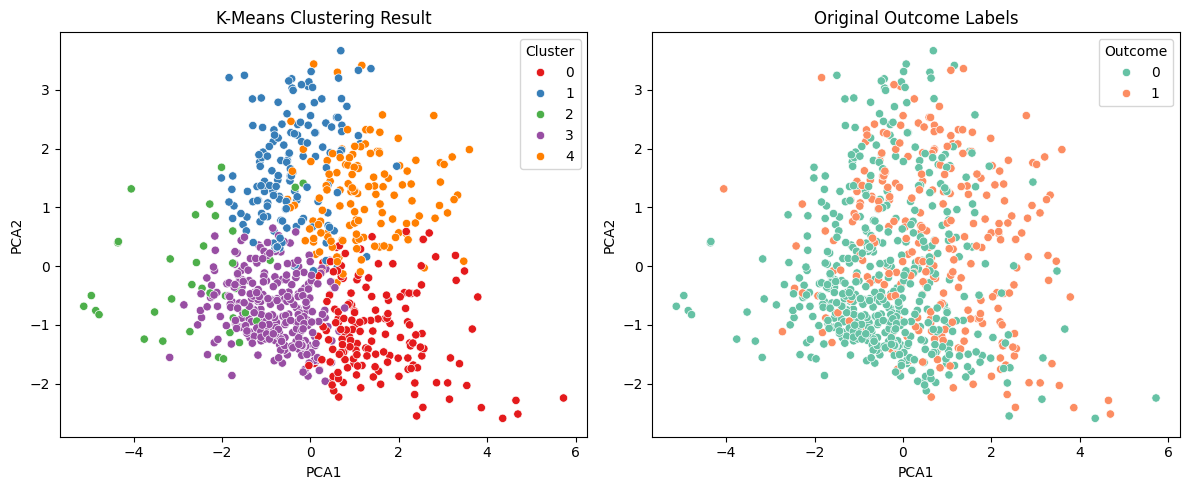

In [106]:
# Load dataset
df = pd.read_csv("pima_indians_diabetes_with_header.csv")

# Simpan label asli untuk perbandingan nanti
true_labels = df['Outcome']

# Drop kolom Outcome
X = df.drop(columns=['Outcome'])

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Jalankan K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['Outcome'] = true_labels  # Tambahkan kembali Outcome untuk visualisasi

# Visualisasi hasil K-Means
plt.figure(figsize=(12, 5))

# Plot K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Plot berdasarkan label asli
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Outcome', palette='Set2')
plt.title('Original Outcome Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

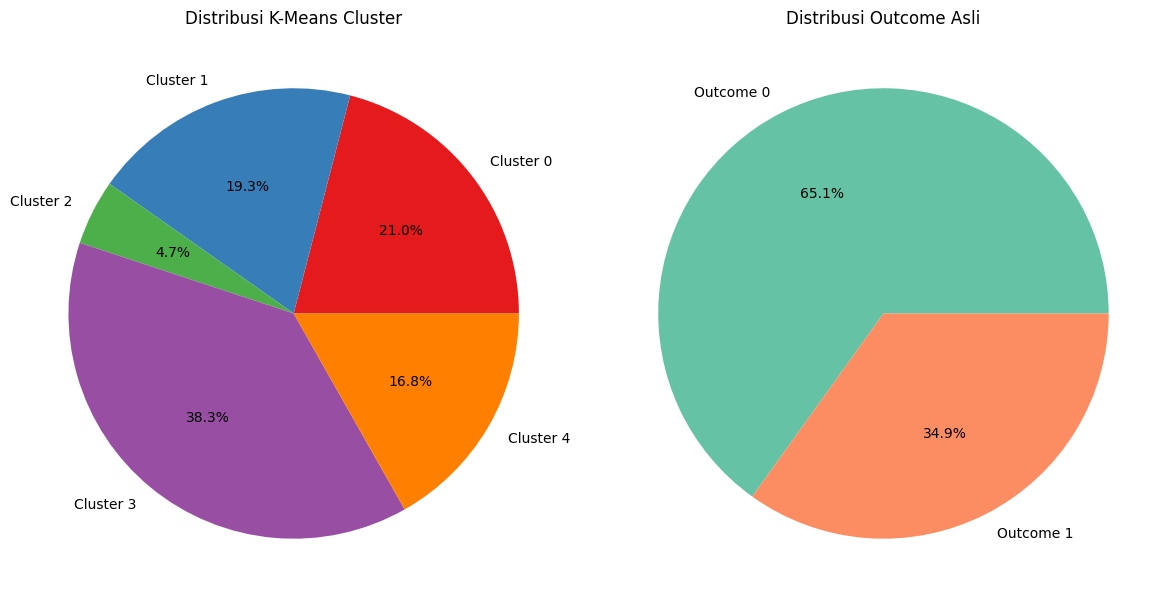

Akurasi Clustering (setelah mapping 4 cluster): 0.6771
Error Rate: 0.3229


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah anggota tiap cluster (hasil K-Means) dan tiap label (Outcome asli)
cluster_counts = df['Cluster'].value_counts().sort_index()
outcome_counts = df['Outcome'].value_counts().sort_index()

# Side-by-side pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart K-Means cluster
axes[0].pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set1", n_colors=len(cluster_counts)))
axes[0].set_title("Distribusi K-Means Cluster")

# Pie chart Outcome asli
axes[1].pie(outcome_counts, labels=[f"Outcome {i}" for i in outcome_counts.index],
            autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(outcome_counts)))
axes[1].set_title("Distribusi Outcome Asli")

plt.tight_layout()
plt.show()

import numpy as np

# Ambil hasil cluster dan label asli
y_pred = df['Cluster']
y_true = df['Outcome']

# Terapkan mapping:
# Cluster 0 → Outcome 1 (diabetes)
# Cluster 1 & 2 → Outcome 0 (tidak diabetes)
mapped_pred = y_pred.apply(lambda x: 1 if x == 0 or x == 4 else 0)

# Hitung akurasi dan error
accuracy = np.mean(mapped_pred == y_true)
error_rate = 1 - accuracy

print(f"Akurasi Clustering (setelah mapping 4 cluster): {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")

Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.72      0.82      0.77       500
      Diabetes       0.56      0.41      0.47       268

      accuracy                           0.68       768
     macro avg       0.64      0.62      0.62       768
  weighted avg       0.66      0.68      0.67       768



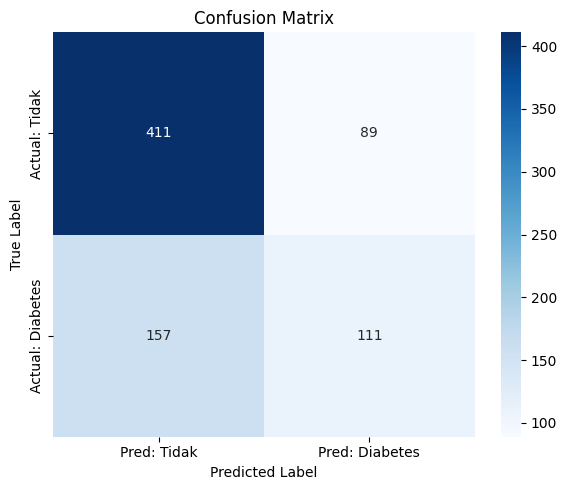

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping cluster ke label: Cluster 0 → 1 (diabetes), Cluster 1/2 → 0 (tidak diabetes)
mapped_pred = df['Cluster'].apply(lambda x: 1 if  x == 0 or x == 4 else 0)
y_true = df['Outcome']

# 1. Classification Report (precision, recall, f1-score)
report = classification_report(y_true, mapped_pred, target_names=["Tidak Diabetes", "Diabetes"])
print("Classification Report:\n")
print(report)

# 2. Confusion Matrix
cm = confusion_matrix(y_true, mapped_pred)

# 3. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred: Tidak", "Pred: Diabetes"], yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Drop BloodPreassure

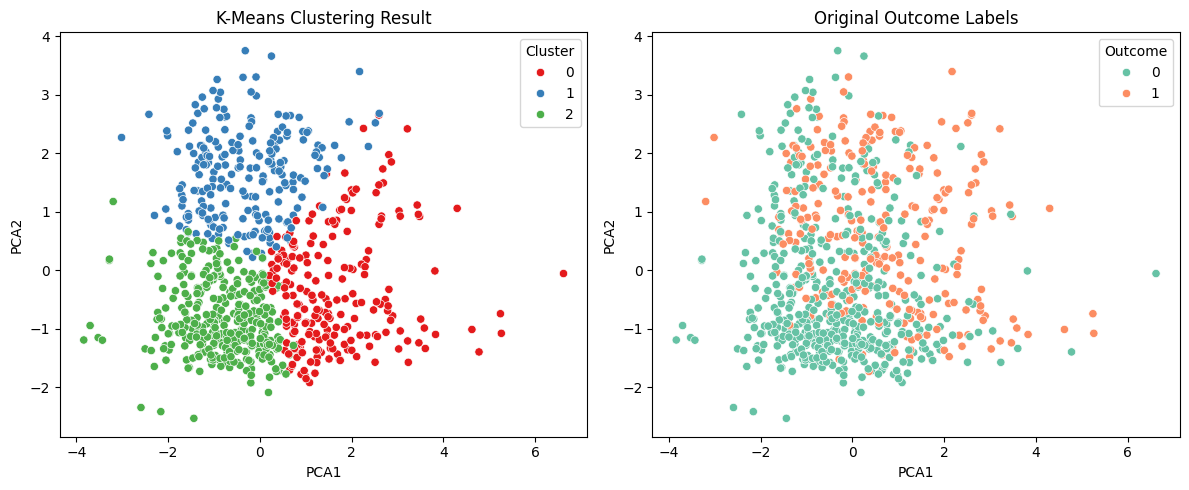

Classification Report:

                precision    recall  f1-score   support

Tidak Diabetes       0.72      0.79      0.75       500
      Diabetes       0.52      0.42      0.46       268

      accuracy                           0.66       768
     macro avg       0.62      0.61      0.61       768
  weighted avg       0.65      0.66      0.65       768



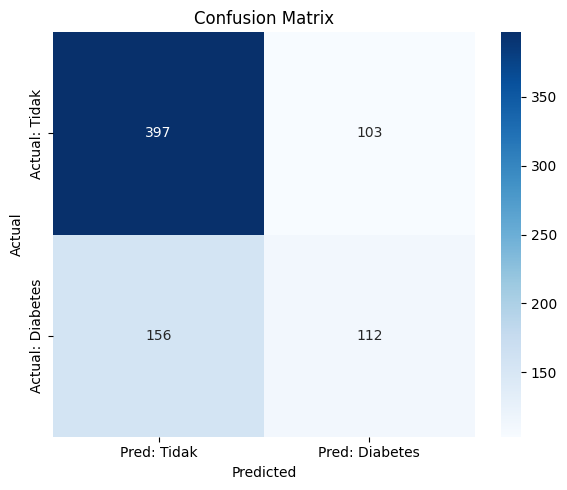

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Baca data
df = pd.read_csv("pima_indians_diabetes_with_header.csv")

# 2. Drop kolom BloodPressure dan simpan Outcome asli
df = df.drop(columns=["BloodPressure"])
y_true = df['Outcome']
X = df.drop(columns=["Outcome"])

# 3. Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Jalankan K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 6. Visualisasi hasil clustering vs. label asli
plt.figure(figsize=(12, 5))

# Clustering result
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Result')

# Original outcome
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue=y_true, palette='Set2')
plt.title('Original Outcome Labels')

plt.tight_layout()
plt.show()

# 7. Mapping cluster ke label: Cluster 0 = diabetes, Cluster 1 & 2 = tidak diabetes
mapped_pred = df['Cluster'].apply(lambda x: 1 if x == 0 else 0)

# 8. Evaluasi kinerja
print("Classification Report:\n")
print(classification_report(y_true, mapped_pred, target_names=["Tidak Diabetes", "Diabetes"]))

# Confusion matrix visual
cm = confusion_matrix(y_true, mapped_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred: Tidak", "Pred: Diabetes"],
            yticklabels=["Actual: Tidak", "Actual: Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()